In [1]:
pip install causalgraphicalmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from causalgraphicalmodels import StructuralCausalModel
from causalgraphicalmodels.csm import discrete_model, linear_model

np.random.seed(10)

# Defining a model

Let us define a model

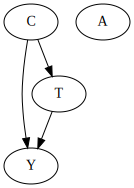

In [3]:
fd0 = StructuralCausalModel({
    "A": lambda n_samples: np.random.binomial(n=1, p=0.3, size=n_samples),
    "C": lambda n_samples: np.random.binomial(n=1, p=0.5, size=n_samples),
    "T": discrete_model(["C"], {(0,): (0.1,0.9), (1,): (0.8,0.2)}),
    "Y": discrete_model(["T", "C"], {
        (0, 0): (0.1, 0.7, 0.2), 
        (0, 1): (0.5, 0.5, 0.0),
        (1, 0): (0.5, 0.1, 0.4), 
        (1, 1): (0.3, 0.1, 0.6),
    }),
})

fd0.cgm.draw()

And sample from it

In [4]:
data_df = fd0.sample(n_samples=10000)
data_df.head()

,A,C,T,Y
0,1,0,1.0,2.0
1,0,1,0.0,1.0
2,0,0,1.0,2.0
3,1,0,1.0,0.0
4,0,0,1.0,0.0


# Estimating probabilities

How do we estimate probabilities from the data?

$P(T=0) = \frac{\text{number of cases where }T=0}{\text{size of the dataset}}  = \frac{|D_{T=0}|}{|D|}$,

where $D$ is the dataset in our dataframe `data_df`.

In [5]:
p_T_0 = len(data_df[data_df['T'] == 0]) / len(data_df)
print('P(T=0) = {}'.format(p_T_0))

p_T_1 = len(data_df[data_df['T'] == 1]) / len(data_df)
print('P(T=1) = {}'.format(p_T_1))

P(T=0) = 0.4525
P(T=1) = 0.5475


# Estimating conditional probabilities

$P(T=0 | C=0) = \frac{\text{number of cases where }T=0 \text{ and } C = 0}{\text{number of cases where } C = 0}  = \frac{|D_{T=0,C=0}|}{|D_{C=0}|}$

In [6]:
p_T_0_cond_C_0 = len(data_df[(data_df['T'] == 0) & (data_df['C'] == 0)]) / len(data_df[data_df['C'] == 0])
print('P(T=0 | C=0) = {}'.format(p_T_0_cond_C_0))

p_T_1_cond_C_0 = len(data_df[(data_df['T'] == 1) & (data_df['C'] == 0)]) / len(data_df[data_df['C'] == 0])
print('P(T=1 | C=0) = {}'.format(p_T_1_cond_C_0))

P(T=0 | C=0) = 0.0975065882829921
P(T=1 | C=0) = 0.9024934117170079


In [7]:
p_T_0_cond_C_1 = len(data_df[(data_df['T'] == 0) & (data_df['C'] == 1)]) / len(data_df[data_df['C'] == 1])
print('P(T=0 | C=1) = {}'.format(p_T_0_cond_C_1))

p_T_1_cond_C_1 = len(data_df[(data_df['T'] == 1) & (data_df['C'] == 1)]) / len(data_df[data_df['C'] == 1])
print('P(T=1 | C=1) = {}'.format(p_T_1_cond_C_1))

P(T=0 | C=1) = 0.798105387803434
P(T=1 | C=1) = 0.20189461219656601


# Joint probability

Probability of 2 events happening simultaneously

$P(T=0,C=0) = \frac{\text{number of cases where }T=0 \text{ and } C = 0}{\text{size of the dataset}} = = \frac{|D_{T=0,C=0}|}{|D|}$

In [8]:
p_T_0_C_0 = len(data_df[(data_df['T'] == 0) & (data_df['C'] == 0)]) / len(data_df)
print('P(T=0, C=0) = {}'.format(p_T_0_C_0))

p_T_0_C_1 = len(data_df[(data_df['T'] == 0) & (data_df['C'] == 1)]) / len(data_df)
print('P(T=0, C=1) = {}'.format(p_T_0_C_1))

p_T_1_C_0 = len(data_df[(data_df['T'] == 1) & (data_df['C'] == 0)]) / len(data_df)
print('P(T=1, C=0) = {}'.format(p_T_1_C_0))

p_T_1_C_1 = len(data_df[(data_df['T'] == 1) & (data_df['C'] == 1)]) / len(data_df)
print('P(T=1, C=1) = {}'.format(p_T_1_C_1))

print('Note that \n\t P(T=0, C=0) + P(T=0, C=1) + P(T=1, C=0) + P(T=1, C=1) = {}'.format(
    p_T_0_C_0 + p_T_0_C_1 + p_T_1_C_0 + p_T_1_C_1
))

P(T=0, C=0) = 0.0481
P(T=0, C=1) = 0.4044
P(T=1, C=0) = 0.4452
P(T=1, C=1) = 0.1023
Note that 
	 P(T=0, C=0) + P(T=0, C=1) + P(T=1, C=0) + P(T=1, C=1) = 1.0


## Joint probability of independent variables

Joint probability of independent variables equals to the product of probabilities:

$P(A, C) = P(A) * P(C)$

$P(T, C) \neq P(T) * P(C)$

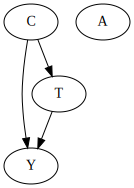

In [9]:
fd0.cgm.draw()

In [10]:
p_A_0_C_0 = len(data_df[(data_df['A'] == 0) & (data_df['C'] == 0)]) / len(data_df)
p_A_0 = len(data_df[(data_df['A'] == 0)]) / len(data_df)
p_C_0 = len(data_df[(data_df['C'] == 0)]) / len(data_df)

print('P(A=0, C=0) = {}, P(A=0)*P(C=0) = {}'.format(p_A_0_C_0, p_A_0 * p_C_0))

print('P(T=0, C=0) = {}, P(T=0)*P(C=0) = {}'.format(p_T_0_C_0, p_T_0 * p_C_0))

P(A=0, C=0) = 0.3478, P(A=0)*P(C=0) = 0.34881243
P(T=0, C=0) = 0.0481, P(T=0)*P(C=0) = 0.22321825


## Bayes' Theorem

$P(T, C) = P(T|C) * P(C) = P(C|T) * P(T)$

Anoter way of calculating conditional probabilities:

$P(T|C) = \frac{P(T, C) }{P(C)}$ and $P(C|T) = \frac{P(T, C) }{P(T)}$

<font color='red'>Can be used as a test for independence.</font>

In [11]:
p_C_0_cond_T_0 = len(data_df[(data_df['T'] == 0) & (data_df['C'] == 0)]) / len(data_df[data_df['T'] == 0])

print('P(T=0, C=0) = {}'.format(p_T_0_C_0))
print('P(T=0 | C=0) * P(C=0) = {}'.format(p_T_0_cond_C_0 * p_C_0))
print('P(C=0 | T=0) * P(T=0) = {}'.format(p_C_0_cond_T_0 * p_T_0))

P(T=0, C=0) = 0.0481
P(T=0 | C=0) * P(C=0) = 0.048100000000000004
P(C=0 | T=0) * P(T=0) = 0.048100000000000004


## Conditional probability of independent variables

$P(A|C) = P(A)$

$P(C|A) = P(C)$

That is why $P(A, C) = P(A) * P(C)$. Indeed,

$P(A, C) = P(A|C) * P(C) = P(A) * P(C)$


In [12]:
p_A_0_cond_C_0 = len(data_df[(data_df['A'] == 0) & (data_df['C'] == 0)]) / len(data_df[data_df['C'] == 0])
p_C_0_cond_A_0 = len(data_df[(data_df['C'] == 0) & (data_df['A'] == 0)]) / len(data_df[data_df['A'] == 0])

print('P(A=0) = {}, p(A=0|C=0) = {}'.format(p_A_0, p_A_0_cond_C_0))
print('P(C=0) = {}, p(C=0|A=0) = {}'.format(p_C_0, p_C_0_cond_A_0))

P(A=0) = 0.7071, p(A=0|C=0) = 0.7050476383539428
P(C=0) = 0.4933, p(C=0|A=0) = 0.4918681940319615


#Exercise: 

1. Check that $P(T=0|C=0,A=0) = P(T=0|C=0)$
2. Will increasing/decreasing sample size result in more correct estimations of probabilities? Show an examples with code.

## 1

In [14]:
data_df = fd0.sample(n_samples=10000)
data_df.head()

,A,C,T,Y
0,1,1,1.0,2.0
1,1,0,0.0,1.0
2,0,1,0.0,1.0
3,0,1,0.0,0.0
4,0,0,1.0,2.0


In [15]:
p_T_0_cond_C_0_A_0 = len(data_df[(data_df['T'] == 0) & (data_df['C'] == 0) & (data_df['A'] == 0)])/ len(data_df[(data_df['C'] == 0) & (data_df['A'] == 0)])
p_T_0_cond_C_0 = len(data_df[(data_df['T'] == 0) & (data_df['C'] == 0)]) / len(data_df[data_df['C'] == 0])
print('P(T=0 | C=0, A=0) = {}'.format(p_T_0_cond_C_0_A_0))
print('P(T=0 | C=0) = {}'.format(p_T_0_cond_C_0))

P(T=0 | C=0, A=0) = 0.10319057200344926
P(T=0 | C=0) = 0.10017924716191993


## 2

Decreasing

In [16]:
data_df = fd0.sample(n_samples=1000)
data_df.head()

,A,C,T,Y
0,0,0,1.0,0.0
1,0,0,1.0,2.0
2,0,0,1.0,2.0
3,1,1,1.0,1.0
4,1,1,0.0,0.0


In [17]:
p_T_0_cond_C_0_A_0 = len(data_df[(data_df['T'] == 0) & (data_df['C'] == 0) & (data_df['A'] == 0)])/ len(data_df[(data_df['C'] == 0) & (data_df['A'] == 0)])
p_T_0_cond_C_0 = len(data_df[(data_df['T'] == 0) & (data_df['C'] == 0)]) / len(data_df[data_df['C'] == 0])
print('P(T=0 | C=0, A=0) = {}'.format(p_T_0_cond_C_0_A_0))
print('P(T=0 | C=0) = {}'.format(p_T_0_cond_C_0))

P(T=0 | C=0, A=0) = 0.0659025787965616
P(T=0 | C=0) = 0.06407766990291262


Increasing

In [18]:
data_df = fd0.sample(n_samples=10000000)
data_df.head()

,A,C,T,Y
0,0,0,1.0,0.0
1,0,1,0.0,0.0
2,0,0,1.0,0.0
3,0,1,0.0,0.0
4,1,0,1.0,0.0


In [19]:
p_T_0_cond_C_0_A_0 = len(data_df[(data_df['T'] == 0) & (data_df['C'] == 0) & (data_df['A'] == 0)])/ len(data_df[(data_df['C'] == 0) & (data_df['A'] == 0)])
p_T_0_cond_C_0 = len(data_df[(data_df['T'] == 0) & (data_df['C'] == 0)]) / len(data_df[data_df['C'] == 0])
print('P(T=0 | C=0, A=0) = {}'.format(p_T_0_cond_C_0_A_0))
print('P(T=0 | C=0) = {}'.format(p_T_0_cond_C_0))

P(T=0 | C=0, A=0) = 0.1000294746676524
P(T=0 | C=0) = 0.10009731647421453


I conclude that increasing sample size makes our estimation of probabilities more accurate.